In [2]:
import polars as pl
import numpy as np
import pandas as pd

## 1. Basic Probability

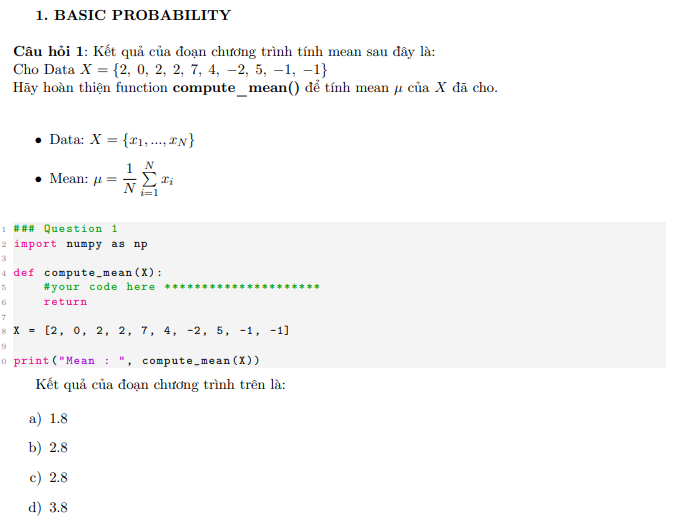

In [11]:
def compute_mean(X):
    # Check if X not list return X
    if not isinstance(X, list):
        return X
    if all(isinstance(x, int) for x in X):
        return sum(X) / len(X)
    else: 
        return "Please check the output again"

X = [2 , 0 , 2 , 2 , 7, 4 , -2 , 5 , -1 , -1]
x_test = 10
print(compute_mean(x_test))

10


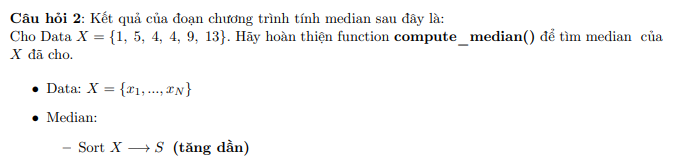
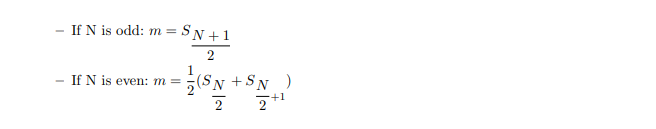

In [14]:
def compute_median(X):
    size = len(X)
    X = np.sort(X)
    if size % 2 == 0:
        median = (X[size//2 - 1] + X[size//2]) / 2.0
    else:
        median = X[size//2]
    return median

X_test = [1 , 5 , 4 , 4 , 9, 13]
print("Median: ", compute_median(X_test))

Median:  4.5


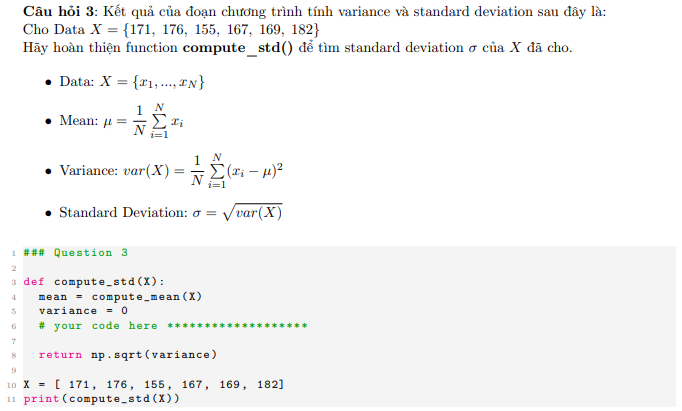
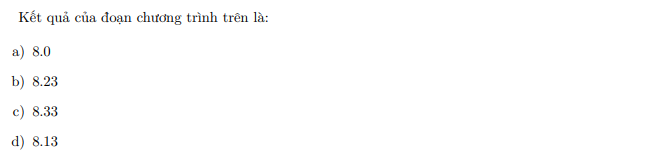

In [20]:
def compute_std(X):
    mean = np.mean(X)
    sum_ = sum((x - mean)**2 for x in X)
    variance = sum_ / len(X)
    return np.sqrt(variance)

X_test = [171 , 176 , 155 , 167 , 169 , 182]
print(compute_std(X_test))

8.32666399786453


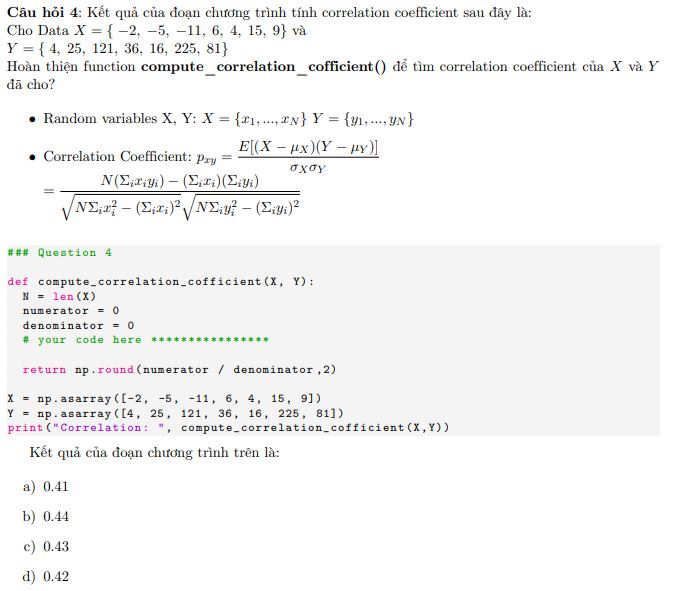

In [21]:
def Pearson_correlation(X,Y):
    if len(X)==len(Y):
        Sum_xy = sum((X-X.mean())*(Y-Y.mean()))
        Sum_x_squared = sum((X-X.mean())**2)
        Sum_y_squared = sum((Y-Y.mean())**2)       
        corr = Sum_xy / np.sqrt(Sum_x_squared * Sum_y_squared)
    return corr

X = np.asarray([ -2 , -5 , -11 , 6 , 4 , 15 , 9])
Y = np.asarray([4 , 25 , 121 , 36 , 16 , 225 , 81])

print(Pearson_correlation(X,Y))

0.4202633309602727


## 2. Tabular Data Analysis

In [22]:
import os

def download_dataset(url):
    gdown_command = f'{url}'
    os.system(gdown_command)
    print("Download complete.")

path = "gdown https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq"
download_dataset(path)

Download complete.


In [23]:
polars_dataframe = pl.read_csv("./content/advertising.csv")

In [24]:
polars_dataframe

TV,Radio,Newspaper,Sales
f64,f64,f64,f64
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
…,…,…,…
38.2,3.7,13.8,7.6
94.2,4.9,8.1,14.0
177.0,9.3,6.4,14.8


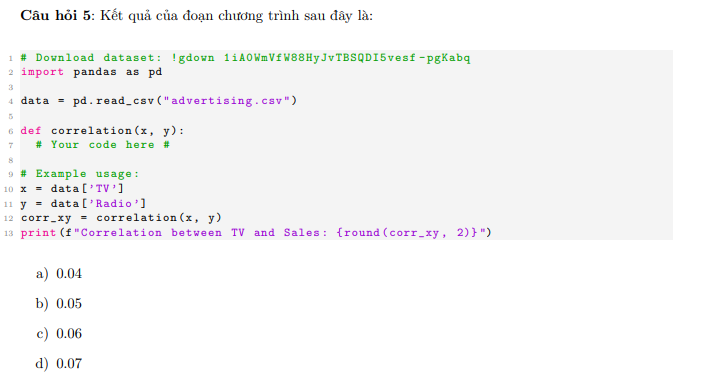

In [27]:
x = polars_dataframe['TV'].to_pandas()
y = polars_dataframe['Radio'].to_pandas()
print(f"Correlation between TV and Sales: {round(Pearson_correlation(x , y), 2)}")

Correlation between TV and Sales: 0.05


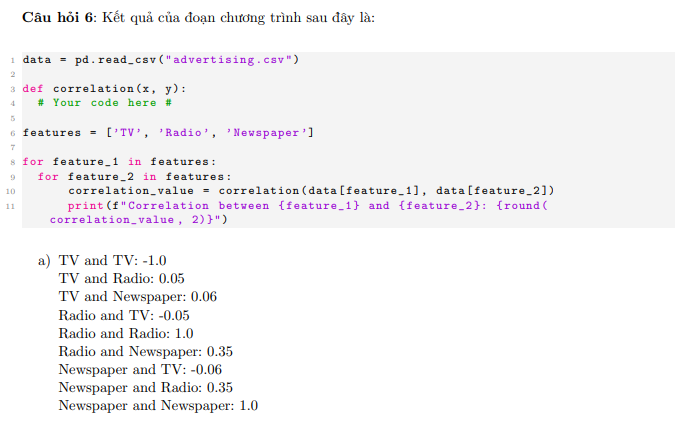
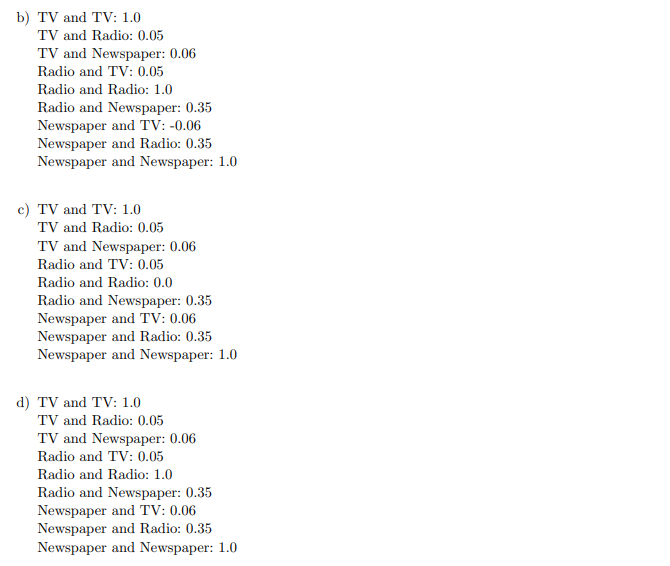

In [29]:
features = ['TV', 'Radio', 'Newspaper']

for feature_1 in features:
    for feature_2 in features:
        correlation_value = Pearson_correlation(polars_dataframe[feature_1],polars_dataframe[feature_2])
        print(f"Correlation between {feature_1} and {feature_2}: {round(correlation_value, 2)}")

Correlation between TV and TV: 1.0
Correlation between TV and Radio: 0.05
Correlation between TV and Newspaper: 0.06
Correlation between Radio and TV: 0.05
Correlation between Radio and Radio: 1.0
Correlation between Radio and Newspaper: 0.35
Correlation between Newspaper and TV: 0.06
Correlation between Newspaper and Radio: 0.35
Correlation between Newspaper and Newspaper: 1.0


### Ex 6: D

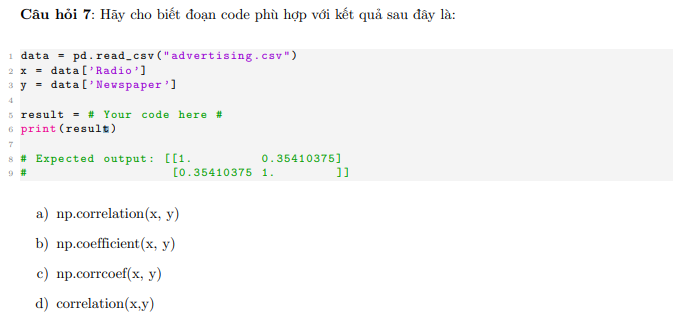

In [32]:
Radio_Newspaper_corr = polars_dataframe.select(pl.corr("Radio", "Newspaper"))
Radio_Newspaper_corr

R2 = np.corrcoef(polars_dataframe["Radio"], polars_dataframe["Newspaper"])
R2

array([[1.        , 0.35410375],
       [0.35410375, 1.        ]])

### Ex 7: C

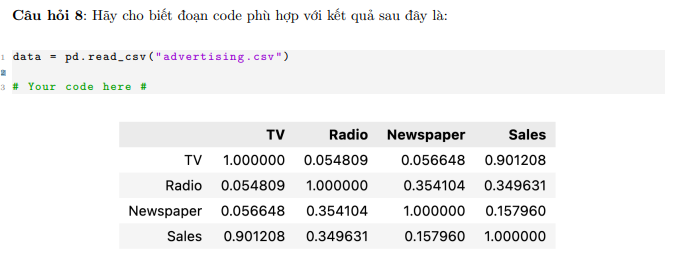

a) np.corr(x, y) <br>
b) data.corr(x, y) <br>
c) data.correlation(x, y) <br>
d) data.corr()

In [42]:
correlation_ex8 = polars_dataframe.corr()
correlation_ex8

TV,Radio,Newspaper,Sales
f64,f64,f64,f64
1.0,0.054809,0.056648,0.901208
0.054809,1.0,0.354104,0.349631
0.056648,0.354104,1.0,0.15796
0.901208,0.349631,0.15796,1.0


### Ex 8: D

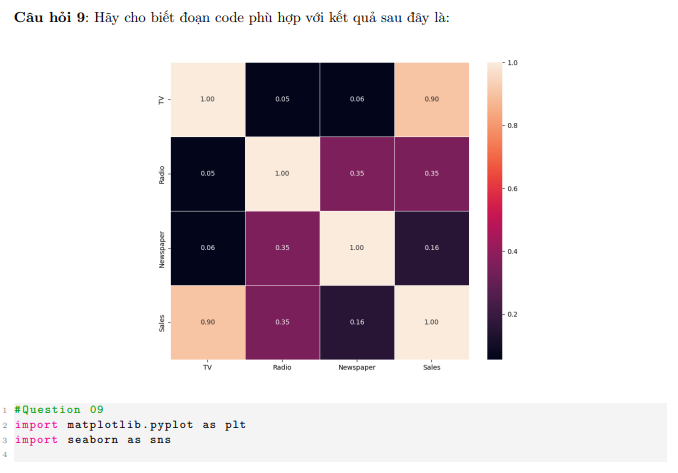
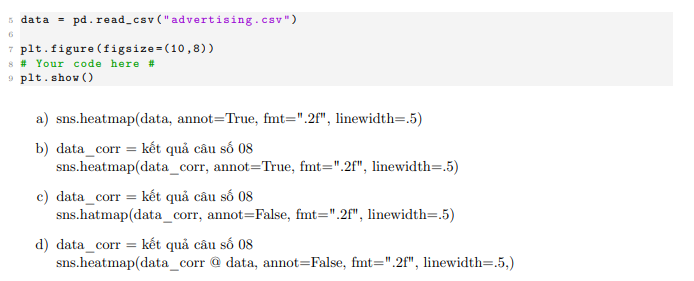

In [40]:
!pip install seaborn


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


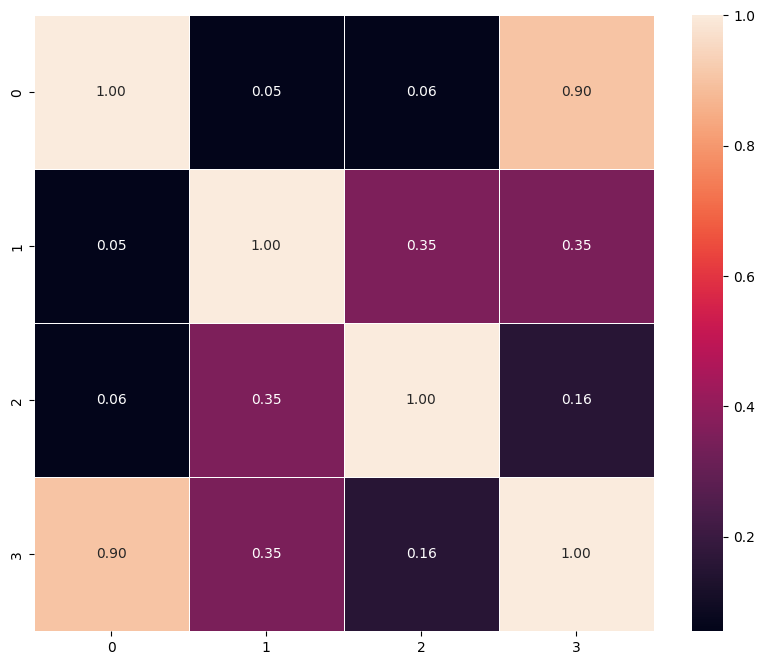

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10 ,8))
sns.heatmap(correlation_ex8, annot=True, fmt=".2f", linewidth=.5)
plt.show()

### Ex 9: B

## 3. Text Retrieval

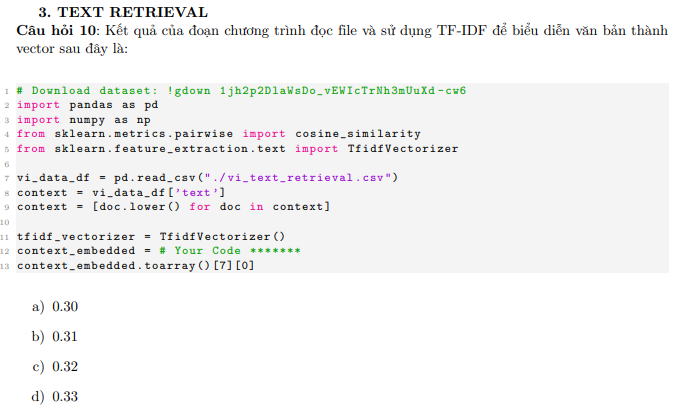

In [45]:
!pip install gdown


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
path = "gdown https://drive.google.com/uc?id=1jh2p2DlaWsDo_vEWIcTrNh3mUuXd-cw6"
download_dataset(path)

Download complete.


In [3]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

vi_data_df = pl.read_csv("./content/vi_text_retrieval.csv")
context = vi_data_df.with_columns(text_lower=pl.col("text").str.to_lowercase())['text_lower']
tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
context_embedded.toarray()[7][0]

0.31126580760710637

### Ex 10: B

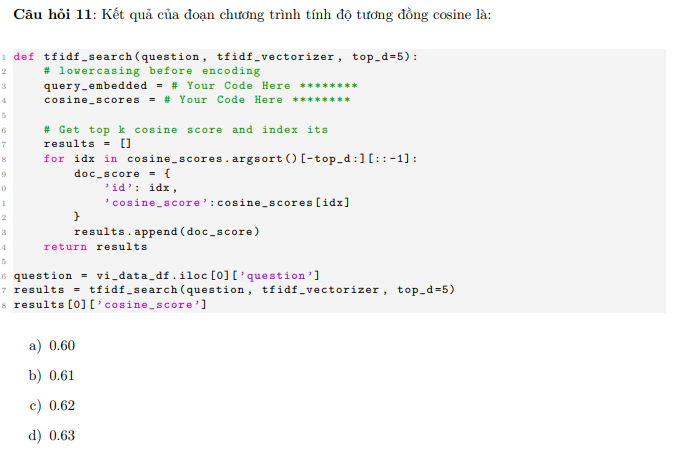

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

def tfidf_search(question, tfidf_vectorizer, top_d=5):
    # Lowercasing the question before encoding
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    
    # Calculate cosine similarity scores between the query and all documents
    cosine_scores = cosine_similarity(query_embedded, tfidf_vectorizer.transform(tfidf_vectorizer.get_feature_names_out())).flatten()
    
    # Get top k cosine scores and their indices
    results = []
    for idx in cosine_scores.argsort()[-top_d:][::-1]:
        doc_score = {
            'id': idx,
            'cosine_score': cosine_scores[idx]
        }
        results.append(doc_score)
    
    return results

question = vi_data_df.to_pandas().iloc[0]['question']
results = tfidf_search(question, tfidf_vectorizer, top_d=5)
print(results[0]['cosine_score'])

0.4000171172452951


### Ex 11: A

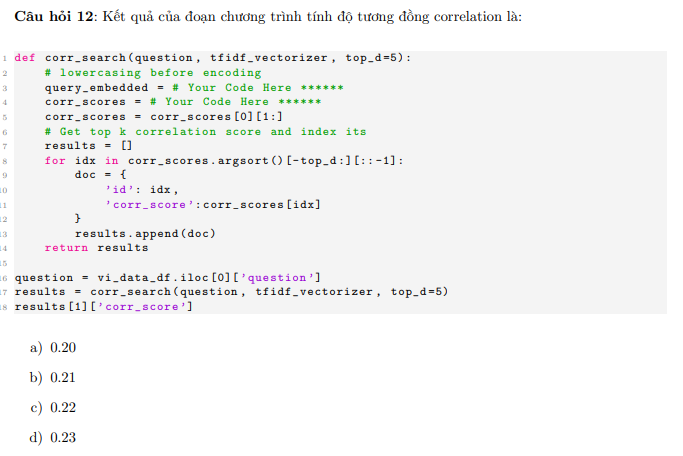

In [22]:
def corr_search(question, tfidf_vectorizer, top_d=5):
    # lowercasing before encoding
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    
    # Compute cosine similarity between the query and the documents
    corr_scores = cosine_similarity(query_embedded, tfidf_vectorizer.transform(tfidf_vectorizer.get_feature_names_out()))
    corr_scores = corr_scores[0][1:]
    
    # Get top k correlation score and index its
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'corr_score': corr_scores[idx]
        }
        results.append(doc)
    return results
    
question = vi_data_df.to_pandas().iloc[0]['question']
results = corr_search(question, tfidf_vectorizer, top_d =5)
results[1]['corr_score']

0.4000171172452951

### Ex 12